In [1]:
#計算とグラフプロットに必要なモジュールの読み込み
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

図9.9（その1）：制御対象とコントローラのフィードバック結合を与えてステップ応答を求める方法

In [2]:
#伝達関数の分子・分母多項式を与える
num = [ 0, 1 ] #分子多項式
den = [ 1, 1 ] #分母多項式

#比例ゲインのパラメータを与える
Kp1 = 1.0 #K_p=1
Kp2 = 5.0 #K_p=5
Kp3 = 10.0 #K_p=10

#Pコントローラの分子・分母多項式を与える
numc1 = [Kp1] #K_p=1の場合の分子多項式
numc2 = [Kp2] #K_p=5の場合の分子多項式
numc3 = [Kp3] #K_p=10の場合の分子多項式
denc = [1] #分母多項式

#コントローラの伝達関数表現を与える
sys = matlab.tf( num, den ) #制御対象の伝達関数表現
c1 = matlab.tf(numc1,denc) #K_p=1の場合のコントローラの伝達関数表現
c2 = matlab.tf(numc2,denc) #K_p=5の場合のコントローラの伝達関数表現
c3 = matlab.tf(numc3,denc) #K_p=10の場合のコントローラの伝達関数表現

#コントローラと1次遅れ系のフィードバック結合を与える
sysc1 = matlab.feedback(c1*sys, 1) #K_p=1の場合のフィードバック結合
sysc2 = matlab.feedback(c2*sys, 1) #K_p=5の場合のフィードバック結合
sysc3 = matlab.feedback(c3*sys, 1) #K_p=10の場合のフィードバック結合

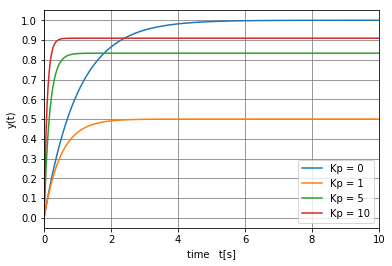

In [3]:
#時間変数の定義
t = arange(0, 10, 0.01) #0から10まで0.01刻み

#ステップ応答の計算
y0, t0 = matlab.step(sys,t) #K_p=0の場合のステップ応答
y1, t1 = matlab.step(sysc1,t) #K_p=1の場合のステップ応答
y2, t2 = matlab.step(sysc2,t) #K_p=5の場合のステップ応答
y3, t3 = matlab.step(sysc3,t) #K_p=10の場合のステップ応答

#図9．9のプロット
plt.plot(t0, y0, label = "Kp = 0") #ステップ応答をプロット
plt.plot(t1, y1, label = "Kp = 1") #ステップ応答をプロット
plt.plot(t2, y2, label = "Kp = 5") #ステップ応答をプロット
plt.plot(t3, y3, label = "Kp = 10") #ステップ応答をプロット
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.xticks([0,2,4,6,8,10]) #横軸の目盛りの値の設定
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

図9.9のプロット（その2）：目標値から出力までの伝達関数G_{yr}(s)の分子・分母多項式を与えてステップ応答を求める方法

In [4]:
#1次遅れ系のパラメータと比例ゲインのパラメータを与える
a = 1.0 #a=1
b = 1.0 #b=1
Kp1 = 1.0 #K_p=1
Kp2 = 5.0 #K_p=5
Kp3 = 10.0 #K_p=10

#目標値から出力までの伝達関数G_yr(s)の分子・分母多項式を与える
num0 = [0, b] #K_p=0の場合の分子多項式
den0 = [1, a] #K_p=0の場合の分母多項式
num1 = [0, b * Kp1] #K_p=1の場合の分子多項式  
den1 = [1, a + b * Kp1] #K_p=1の場合の分母多項式
num2 = [0, b * Kp2] #K_p=5の場合の分子多項式   
den2 = [1, a + b * Kp2] #K_p=5の場合の分母多項式
num3 = [0, b * Kp3] #K_p=10の場合の分子多項式   
den3 = [1, a + b * Kp3] #K_p=10の場合の分母多項式

#伝達関数表現を与える
sys0 = matlab.tf(num0, den0) #K_p=0の場合の伝達関数表現
sys1 = matlab.tf(num1, den1) #K_p=1の場合の伝達関数表現
sys2 = matlab.tf(num2, den2) #K_p=5の場合の伝達関数表現
sys3 = matlab.tf(num3, den3) #K_p=10の場合の伝達関数表現

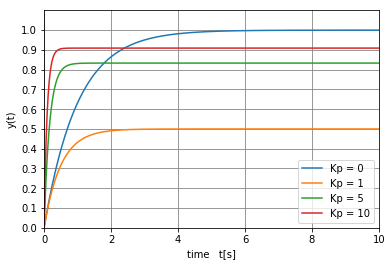

In [5]:
#時間変数の定義
t = arange(0, 10, 0.01) #0から10まで0.01刻み

#ステップ応答の計算
yc0, tc0 = matlab.step(sys0,t) #K_p=0の場合のステップ応答
yc1, tc1 = matlab.step(sysc1,t) #K_p=1の場合のステップ応答
yc2, tc2 = matlab.step(sysc2,t) #K_p=5の場合のステップ応答
yc3, tc3 = matlab.step(sysc3,t) #K_p=10の場合のステップ応答

#図9．9のプロット
plt.plot(tc0, yc0, label = "Kp = 0") #ステップ応答をプロット
plt.plot(tc1, yc1, label = "Kp = 1") #ステップ応答をプロット
plt.plot(tc2, yc2, label = "Kp = 5") #ステップ応答をプロット
plt.plot(tc3, yc3, label = "Kp = 10") #ステップ応答をプロット
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([0.0,1.1]) #縦軸の範囲の指定
plt.xticks([0,2,4,6,8,10]) #横軸の目盛りの値の設定
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]) #縦軸の目盛りの値の設定
plt.grid(color='gray') #罫線を灰色で表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("y(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示